In [37]:
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

Importing the dataset

In [38]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

Traing the model

In [39]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

fitting the 2d image

In [40]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))


compile the input

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

trainig the model

In [48]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0240 - accuracy: 0.9920
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0208 - accuracy: 0.9929
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0171 - accuracy: 0.9939
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0143 - accuracy: 0.9950
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0115 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0101 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.009

In [49]:
model.save('handwriting1.model')

INFO:tensorflow:Assets written to: handwriting1.model\assets


INFO:tensorflow:Assets written to: handwriting1.model\assets


In [50]:
model2 = tf.keras.models.load_model("handwriting1.model")

In [51]:
loss,accuracy = model.evaluate(x_test,y_test)
loss
accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.1343 - accuracy: 0.9743


0.9743000268936157

predicting the input

1/1 [==============================] - 0s 28ms/step
This is the predicted number 1
1/1 [==============================] - 0s 22ms/step
This is the predicted number 2
1/1 [==============================] - 0s 32ms/step
This is the predicted number 2
1/1 [==============================] - 0s 31ms/step
This is the predicted number 4


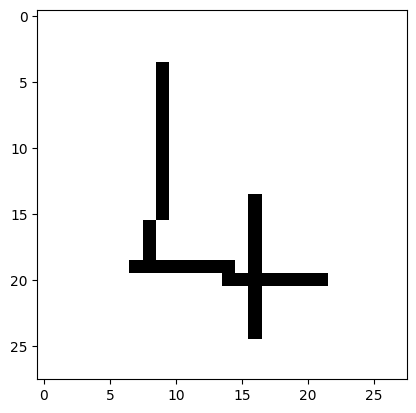

In [53]:
image = 1
while os.path.isfile(f"digits/{image}.png"):
    try:
        img = cv2.imread(f"digits/{image}.png")[:,:,0]
        img = np.invert(np.array([img]))
        predict = model.predict(img)
        plt.imshow(img[0],cmap=plt.cm.binary)
        print(f"This is the predicted number {np.argmax(predict)}")
        
    except:
        print("Error")
    finally:
        image += 1